In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import os

# Name of the CSV file
file = '../Resources/ignore/US_Accidents_May19.csv'
df_clean_accidents = pd.read_csv(file)

# Name of the CSV file
file2 = '../Resources/1998221.csv'
weather_days_source = pd.read_csv(file2)

In [5]:
# Cleaning Data for Weather Type per State

# 01 - Create relevant df with data for the weather comparison
df_weather = df_clean_accidents[['ID', 'Severity', 'Start_Time', 'City', 'County', 'State', 'Timezone',
                 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
                 'Sunrise_Sunset', 'Start_Year']]

In [6]:
# Cleaning Data for Weather Type per State

# 02 - Delete rows with Weather_Condition as null
df_weather = df_weather.dropna(subset=['Weather_Condition'])

In [7]:
# Cleaning Data for Weather Type per State

# 03 - Unique values for Weather Condition - possibility for tighter clusters?
df_weather['Weather_Condition'].value_counts()

Clear                                  808182
Overcast                               382482
Mostly Cloudy                          310086
Partly Cloudy                          208371
Scattered Clouds                       204654
Light Rain                             107164
Light Snow                              36038
Haze                                    27727
Rain                                    24824
Fog                                     11617
Heavy Rain                               8929
Light Drizzle                            8058
Light Thunderstorms and Rain             4928
Thunderstorm                             4439
Snow                                     4099
Smoke                                    3010
Heavy Thunderstorms and Rain             2484
Thunderstorms and Rain                   2215
Light Freezing Rain                      1997
Mist                                     1918
Patches of Fog                           1878
Drizzle                           

In [8]:
# Cleaning Data for Weather Type per State

# 04 - Create smaller clusters of Weather Type
df_weather['Weather_Condition_Corrected'] = df_weather['Weather_Condition']
df_weather['Weather_Condition_Corrected'] = df_weather['Weather_Condition_Corrected'].replace(
    {"Mostly Cloudy": "Cloudy",
     "Partly Cloudy": "Cloudy",
     "Scattered Clouds": "Cloudy",
     "Funnel Cloud": "Cloudy",
     'Overcast': 'Cloudy',
     'Drizzle': 'Rain',
     'Light Drizzle': 'Rain',
     'Light Freezing Drizzle': 'Rain',
     'Heavy Drizzle': 'Rain',
     'Heavy Freezing Drizzle': 'Rain',
     'Widespread Dust': 'Dust',
     'Dust Whirls': 'Dust',
     'Volcanic Ash': 'Dust',
     'Sand': 'Dust',
     'Blowing Sand': 'Dust',
     'Haze': 'Fog',
     'Patches of Fog': 'Fog',
     'Light Freezing Fog': 'Fog',
     'Shallow Fog': 'Fog',
     'Light Fog': 'Fog',
     'Mist': 'Fog',
     'Small Hail': 'Hail',
     'Light Hail': 'Hail',
     'Ice Pellets': 'Hail',
     'Light Haze': 'Fog',
     'Light Ice Pellets': 'Hail',
     'Heavy Ice Pellets': 'Hail',
     'Light Rain': 'Rain',
     'Heavy Rain': 'Rain',
     'Light Thunderstorms and Rain': 'Thunderstorm',
     'Heavy Thunderstorms and Rain': 'Thunderstorm',
     'Thunderstorms and Rain': 'Thunderstorm',
     'Light Freezing Rain': 'Rain',
     'Light Rain Showers': 'Rain',
     'Rain Showers': 'Rain',
     'Heavy Rain Showers': 'Rain',
     'Snow Grains': 'Snow',
     'Light Snow Grains': 'Snow',
     'Heavy Freezing Rain': 'Rain',
     'Heavy Smoke': 'Smoke',
     'Light Snow': 'Snow',
     'Heavy Snow': 'Snow',
     'Blowing Snow': 'Snow',
     'Light Snow Showers': 'Snow',
     'Light Thunderstorms and Snow': 'Snow',
     'Low Drifting Snow': 'Snow',
     'Heavy Thunderstorms and Snow': 'Snow',
     'Thunderstorms and Snow': 'Snow',
     'Heavy Blowing Snow': 'Snow',
     'Light Blowing Snow': 'Snow',
     'Snow Showers': 'Snow',
     'Heavy Thunderstorms with Small Hail': 'Thunderstorm',
     'Light Thunderstorm': 'Thunderstorm'
    })

df_weather['Weather_Condition_Corrected'].value_counts()

Cloudy          1105610
Clear            808182
Rain             153840
Fog               44996
Snow              41625
Thunderstorm      14076
Smoke              3011
Hail                397
Dust                172
Squalls              26
Name: Weather_Condition_Corrected, dtype: int64

In [12]:
# Create Chart Weather and State of Accidents (2016-2018)

# 01 - DF with Weather Condition, State and counts
df_weather_state = pd.DataFrame(df_weather.groupby(['Weather_Condition_Corrected','State'])['ID'].count().reset_index())


In [13]:
# Create Chart Weather and State of Accidents (2016-2018)

# 02 - DF to add percentages of each Weather Type in the Chart
df_weather_global = pd.DataFrame(df_weather.groupby(['Weather_Condition_Corrected'])['ID'].count().reset_index())
df_weather_global['Percent'] = ((df_weather_global['ID'] / df_weather_global['ID'].sum()) * 100).round(1)
df_weather_global

,Weather_Condition_Corrected,ID,Percent
0,Clear,742981,38.0
1,Cloudy,993376,50.8
2,Dust,147,0.0
3,Fog,39841,2.0
4,Hail,297,0.0
5,Rain,132625,6.8
6,Smoke,2961,0.2
7,Snow,29742,1.5
8,Squalls,22,0.0
9,Thunderstorm,13740,0.7


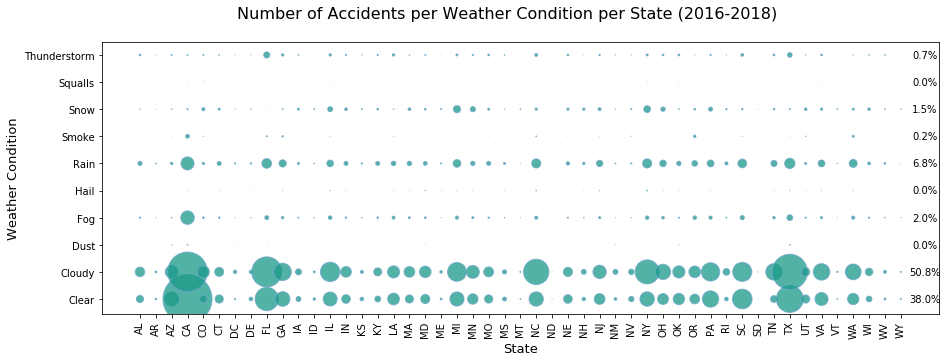

In [48]:
# Create Chart Weather and State of Accidents (2016-2018)

# 03 - Create chart for Weather Condition per State

fig = plt.figure(figsize=(15,5))
st = fig.suptitle('Number of Accidents per Weather Condition per State (2016-2018)', fontsize=16)

x_axis = list(df_weather_state['State'])
data = list(df_weather_state['Weather_Condition_Corrected'])
size = [i / 100 for i in list(df_weather_state['ID'])]

plt.scatter(x_axis, data, marker="o", facecolors="#1a9988", edgecolors="#6aa4c8",
            s=size, alpha=0.75)
plt.xticks(rotation="vertical")
plt.xlabel("State", fontsize=13)
plt.ylabel("Weather Condition", fontsize=13)
plt.tight_layout

# Add percentages on the right side of the chart
heights = list(df_weather_global['Percent'])

for i in range(0,len(heights)):
    plt.text(49.5, i, '{}%'.format(heights[i]), horizontalalignment='center', verticalalignment='center')

# Save Chart in png
plt.savefig("Outputs/State_per_weather_condition.png")



In [29]:
# Cleaning Weather Days_source

# 01 - checking the column names
weather_days_source.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'PRCP',
       'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES',
       'WT02', 'WT02_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES', 'WT04',
       'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES', 'WT06', 'WT06_ATTRIBUTES',
       'WT07', 'WT07_ATTRIBUTES', 'WT08', 'WT08_ATTRIBUTES', 'WT09',
       'WT09_ATTRIBUTES'],
      dtype='object')

In [30]:
# Cleaning Weather Days_source

# 02 - extracting the needed columns
weather_days_dv_ri_sf = weather_days_source[['NAME', 'DATE', 'PRCP', 'SNOW', 'WT01', 'WT02', 
                                               'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09']]

In [31]:
# Cleaning Weather Days_source

# 03 - creating Year column
weather_days_dv_ri_sf["YEAR"] = weather_days_dv_ri_sf["DATE"].agg(lambda x: x.split("-")[0])

# 04 - creating columns to access which type of weather do we have
weather_days_dv_ri_sf['PRCP_calc'] = ''
weather_days_dv_ri_sf['SNOW_calc'] = ''
weather_days_dv_ri_sf['Weather_cond'] = ''

In [33]:
# Cleaning Weather Days_source

# 05 - Label Snowy and Rainy days
for i in range(0,len(weather_days_dv_ri_sf)):

    if weather_days_dv_ri_sf.iloc[i,2] > 0.0:
        weather_days_dv_ri_sf.iloc[i,14] = 'y'
    else: 
        weather_days_dv_ri_sf.iloc[i,14] = 'n'
        
    if weather_days_dv_ri_sf.iloc[i,3] > 0.0:
        weather_days_dv_ri_sf.iloc[i,15] = 'y'
    else: 
        weather_days_dv_ri_sf.iloc[i,15] = 'n'

In [34]:
# Cleaning Weather Days_source

# 06 - Final labeling of different weather types

for i in range(0,len(weather_days_dv_ri_sf)):

# Code -> Official Description for Weather Type -> Our Weather Type
# WT01 -> Fog, ice fog, or freezing fog (may include heavy fog) -> Fog
# WT02 -> Heavy fog or heaving freezing fog (not always distinguished from fog) -> Fog
# WT03 -> Thunder -> Thunder
# WT04 -> Ice pellets, sleet, snow pellets, or small hail -> Hail
# WT05 -> Hail (may include small hail) -> Hail
# WT06 -> Glaze or rime -> Snow
# WT07 -> Dust, volcanic ash, blowing dust, blowing sand, or blowing obstruction -> Dust
# WT08 -> Smoke or haze -> Smoke
# WT09 -> Blowing or drifting snow -> Snow

    
# Based on the existance of snow (WT06 and WT09 and SNOW = Snow)
    if (weather_days_dv_ri_sf.iloc[i,9] > 0 or weather_days_dv_ri_sf.iloc[i,12] > 0 or weather_days_dv_ri_sf.iloc[i,15] == 'y'):
        weather_days_dv_ri_sf.iloc[i,16] = 'Snow'

# Based on the existance of thunderstorm (WT03 = Thunder)
    elif weather_days_dv_ri_sf.iloc[i,6] > 0:
        weather_days_dv_ri_sf.iloc[i,16] = 'Thunderstorm'

# Based on the existance of rain (PRCP = Rain)
    elif weather_days_dv_ri_sf.iloc[i,14] == 'y':
        weather_days_dv_ri_sf.iloc[i,16] = 'Rain'

# Based on the existance of hail (WT04 and WT05 = Hail)
    elif (weather_days_dv_ri_sf.iloc[i,7] > 0 or weather_days_dv_ri_sf.iloc[i,8] > 0):
        weather_days_dv_ri_sf.iloc[i,16] = 'Hail'

# Based on the existance of fog (WT01 and WT02 = Fog)
    elif (weather_days_dv_ri_sf.iloc[i,4] > 0 or weather_days_dv_ri_sf.iloc[i,5] > 0):
        weather_days_dv_ri_sf.iloc[i,16] = 'Fog'

# Based on the existance of fog (WT07 = Dust)
    elif weather_days_dv_ri_sf.iloc[i,10] > 0:
        weather_days_dv_ri_sf.iloc[i,16] = 'Dust'

# Based on the existance of fog (WT08 = Smoke)
    elif weather_days_dv_ri_sf.iloc[i,11] > 0:
        weather_days_dv_ri_sf.iloc[i,16] = 'Smoke'
    
# All the remaining should be Clear/Cloudy
    else:
        weather_days_dv_ri_sf.iloc[i,16] = 'Clear/Cloudy'

In [36]:
weather_days_summary = pd.DataFrame(weather_days_dv_ri_sf.groupby(['NAME', 'YEAR', 'Weather_cond'])['DATE'].count().reset_index())
weather_days_summary.rename(columns={'DATE': 'Count'}, inplace = True)
weather_days_summary_final = pd.DataFrame(weather_days_summary.pivot_table(columns = 'YEAR', index = ('NAME', 'Weather_cond'), values = 'Count').reset_index())
weather_days_summary_final['NAME'] = weather_days_summary_final['NAME'].replace({'DENVER INTERNATIONAL AIRPORT, CO US': 'Denver',
                                            'PROVIDENCE, RI US': 'RI',
                                            'SAN FRANCISCO INTERNATIONAL AIRPORT, CA US': 'San Francisco'})
weather_days_summary_final

weather_denver_pre = weather_days_summary_final.loc[weather_days_summary_final['NAME'] == 'Denver']
weather_denver = weather_denver_pre[['Weather_cond', '2016', '2017', '2018']].set_index('Weather_cond')

weather_ri_pre = weather_days_summary_final.loc[weather_days_summary_final['NAME'] == 'RI']
weather_ri = weather_ri_pre[['Weather_cond', '2016', '2017', '2018']].set_index('Weather_cond')

weather_sf_pre = weather_days_summary_final.loc[weather_days_summary_final['NAME'] == 'San Francisco']
weather_sf = weather_sf_pre[['Weather_cond', '2016', '2017', '2018']].set_index('Weather_cond')

weather_days_summary_final

YEAR,NAME,Weather_cond,2016,2017,2018
0,Denver,Clear/Cloudy,236.0,217.0,215.0
1,Denver,Dust,1.0,3.0,3.0
2,Denver,Fog,22.0,36.0,33.0
3,Denver,Rain,21.0,30.0,27.0
4,Denver,Smoke,4.0,7.0,8.0
5,Denver,Snow,21.0,17.0,25.0
6,Denver,Thunderstorm,61.0,55.0,54.0
7,RI,Clear/Cloudy,201.0,168.0,170.0
8,RI,Fog,39.0,52.0,53.0
9,RI,Hail,1.0,1.0,NaN


In [37]:
df_weather_denver = df_weather[(df_weather['City'] == 'Denver') & (df_weather['State'] == 'CO')]
df_weather_denver['Weather_Condition_Corrected2'] = df_weather_denver['Weather_Condition_Corrected']
df_weather_denver['Weather_Condition_Corrected2'] = df_weather_denver['Weather_Condition_Corrected2'].replace(
    {"Clear": "Clear/Cloudy",
     "Cloudy": "Clear/Cloudy"})
df_weather_denver = pd.DataFrame(df_weather_denver.groupby(['Weather_Condition_Corrected2',
                                                            'Start_Year'])['ID'].count().reset_index())
df_weather_denver_trans = df_weather_denver.pivot_table(index=('Weather_Condition_Corrected2'), 
                                                        columns='Start_Year', values='ID')
df_weather_denver_trans

Start_Year,2016,2017,2018
Weather_Condition_Corrected2,,,
Clear/Cloudy,374.0,2456.0,5407.0
Fog,3.0,44.0,51.0
Rain,2.0,100.0,110.0
Smoke,NaN,8.0,4.0
Snow,NaN,111.0,160.0
Thunderstorm,3.0,6.0,4.0


In [38]:
df_weather_den_sfo_ri = df_weather[((df_weather['City'] == 'Denver') & (df_weather['State'] == 'CO')) | 
                                (df_weather['City'] == 'San Francisco') |
                                (df_weather['State'] == 'RI')]
df_weather_den_sfo_ri['Weather_Condition_Corrected2'] = df_weather_den_sfo_ri['Weather_Condition_Corrected']
df_weather_den_sfo_ri['Weather_Condition_Corrected2'] = df_weather_den_sfo_ri['Weather_Condition_Corrected2'].replace(
    {"Clear": "Clear/Cloudy",
     "Cloudy": "Clear/Cloudy"})
df_weather_den_sfo_ri.rename(columns={'State': 'NAME'}, inplace = True)
df_weather_den_sfo_ri['NAME'] = df_weather_den_sfo_ri['NAME'].replace({'CO': 'Denver',
                                            'CA': 'San Francisco'})

df_weather_den_sfo_ri = pd.DataFrame(df_weather_den_sfo_ri.groupby(['Weather_Condition_Corrected2',
                                                            'Start_Year', 'NAME'])['ID'].count().reset_index())
df_weather_den_sfo_ri_trans = pd.DataFrame(df_weather_den_sfo_ri.pivot_table(index=('Weather_Condition_Corrected2', 'NAME'), 
                                                        columns='Start_Year', values='ID').reset_index())

df_weather_den_sfo_ri_norm = df_weather_den_sfo_ri_trans.merge(weather_days_summary_final, 
                                                               left_on=['Weather_Condition_Corrected2','NAME'],
                                                               right_on=['Weather_cond', 'NAME'],
                                                               suffixes=('_number', '_days'),
                                                               how='outer')
df_weather_den_sfo_ri_norm

df_weather_den_sfo_ri_norm['2016_n'] = df_weather_den_sfo_ri_norm['2016_number'] / df_weather_den_sfo_ri_norm['2016_days']
df_weather_den_sfo_ri_norm['2017_n'] = df_weather_den_sfo_ri_norm['2017_number'] / df_weather_den_sfo_ri_norm['2017_days']
df_weather_den_sfo_ri_norm['2018_n'] = df_weather_den_sfo_ri_norm['2018_number'] / df_weather_den_sfo_ri_norm['2018_days']
df_weather_den_sfo_ri_norm

,Weather_Condition_Corrected2,NAME,2016_number,2017_number,2018_number,Weather_cond,2016_days,2017_days,2018_days,2016_n,2017_n,2018_n
0,Clear/Cloudy,Denver,374.0,2456.0,5407.0,Clear/Cloudy,236.0,217.0,215.0,1.584746,11.317972,25.148837
1,Clear/Cloudy,RI,1164.0,2098.0,2618.0,Clear/Cloudy,201.0,168.0,170.0,5.791045,12.488095,15.400000
2,Clear/Cloudy,San Francisco,1592.0,1770.0,1805.0,Clear/Cloudy,257.0,248.0,254.0,6.194553,7.137097,7.106299
3,Fog,Denver,3.0,44.0,51.0,Fog,22.0,36.0,33.0,0.136364,1.222222,1.545455
4,Fog,RI,14.0,40.0,41.0,Fog,39.0,52.0,53.0,0.358974,0.769231,0.773585
5,Fog,San Francisco,5.0,24.0,68.0,Fog,30.0,18.0,35.0,0.166667,1.333333,1.942857
6,Hail,RI,NaN,1.0,NaN,Hail,1.0,1.0,NaN,NaN,1.000000,NaN
7,Rain,Denver,2.0,100.0,110.0,Rain,21.0,30.0,27.0,0.095238,3.333333,4.074074
8,Rain,RI,156.0,351.0,434.0,Rain,89.0,106.0,97.0,1.752809,3.311321,4.474227
9,Rain,San Francisco,58.0,150.0,115.0,Rain,62.0,61.0,52.0,0.935484,2.459016,2.211538


In [39]:
df_weather_den_sfo_ri_norm_clear = df_weather_den_sfo_ri_norm[df_weather_den_sfo_ri_norm['Weather_cond'] == 'Clear/Cloudy']

df_weather_den_sfo_ri_norm_fog = df_weather_den_sfo_ri_norm[df_weather_den_sfo_ri_norm['Weather_cond'] == 'Fog']

df_weather_den_sfo_ri_norm_hail = df_weather_den_sfo_ri_norm[df_weather_den_sfo_ri_norm['Weather_cond'] == 'Hail']

df_weather_den_sfo_ri_norm_rain = df_weather_den_sfo_ri_norm[df_weather_den_sfo_ri_norm['Weather_cond'] == 'Rain']

df_weather_den_sfo_ri_norm_smoke = df_weather_den_sfo_ri_norm[df_weather_den_sfo_ri_norm['Weather_cond'] == 'Smoke']

df_weather_den_sfo_ri_norm_snow = df_weather_den_sfo_ri_norm[df_weather_den_sfo_ri_norm['Weather_cond'] == 'Snow']

df_weather_den_sfo_ri_norm_squalls = df_weather_den_sfo_ri_norm[df_weather_den_sfo_ri_norm['Weather_cond'] == 'Squalls']

df_weather_den_sfo_ri_norm_thunderstorm = df_weather_den_sfo_ri_norm[df_weather_den_sfo_ri_norm['Weather_cond'] == 'Thunderstorm']


In [40]:
df_weather_sf = df_weather[df_weather['City'] == 'San Francisco']
df_weather_sf['Weather_Condition_Corrected2'] = df_weather_sf['Weather_Condition_Corrected']
df_weather_sf['Weather_Condition_Corrected2'] = df_weather_sf['Weather_Condition_Corrected2'].replace(
    {"Clear": "Clear/Cloudy",
     "Cloudy": "Clear/Cloudy"})
df_weather_sf = pd.DataFrame(df_weather_sf.groupby(['Weather_Condition_Corrected2',
                                                            'Start_Year'])['ID'].count().reset_index())
df_weather_sf_trans = df_weather_sf.pivot_table(index=('Weather_Condition_Corrected2'), 
                                                        columns='Start_Year', values='ID')
df_weather_sf_trans

Start_Year,2016,2017,2018
Weather_Condition_Corrected2,,,
Clear/Cloudy,1592.0,1770.0,1805.0
Fog,5.0,24.0,68.0
Rain,58.0,150.0,115.0
Smoke,NaN,NaN,10.0
Squalls,NaN,1.0,NaN
Thunderstorm,NaN,1.0,NaN


In [41]:
df_weather_ri = df_weather[df_weather['State'] == 'RI']
df_weather_ri['Weather_Condition_Corrected2'] = df_weather_ri['Weather_Condition_Corrected']
df_weather_ri['Weather_Condition_Corrected2'] = df_weather_ri['Weather_Condition_Corrected2'].replace(
    {"Clear": "Clear/Cloudy",
     "Cloudy": "Clear/Cloudy"})
df_weather_ri = pd.DataFrame(df_weather_ri.groupby(['Weather_Condition_Corrected2',
                                                            'Start_Year'])['ID'].count().reset_index())
df_weather_ri_trans = df_weather_ri.pivot_table(index=('Weather_Condition_Corrected2'), 
                                                        columns='Start_Year', values='ID')
df_weather_ri_trans

Start_Year,2016,2017,2018
Weather_Condition_Corrected2,,,
Clear/Cloudy,1164.0,2098.0,2618.0
Fog,14.0,40.0,41.0
Hail,NaN,1.0,NaN
Rain,156.0,351.0,434.0
Snow,19.0,71.0,92.0
Thunderstorm,5.0,3.0,9.0


In [42]:
df_weather_denver_trans_norm = df_weather_denver_trans.div(weather_denver, axis = 0)
df_weather_denver_trans_norm

df_weather_ri_trans_norm = df_weather_ri_trans.div(weather_ri, axis = 0)
df_weather_ri_trans_norm

df_weather_sf_trans_norm = df_weather_sf_trans.div(weather_sf, axis = 0)
df_weather_sf_trans_norm

Start_Year,2016,2017,2018
Clear/Cloudy,6.194553,7.137097,7.106299
Fog,0.166667,1.333333,1.942857
Rain,0.935484,2.459016,2.211538
Smoke,NaN,NaN,0.434783
Snow,NaN,NaN,NaN
Squalls,NaN,NaN,NaN
Thunderstorm,NaN,0.111111,NaN


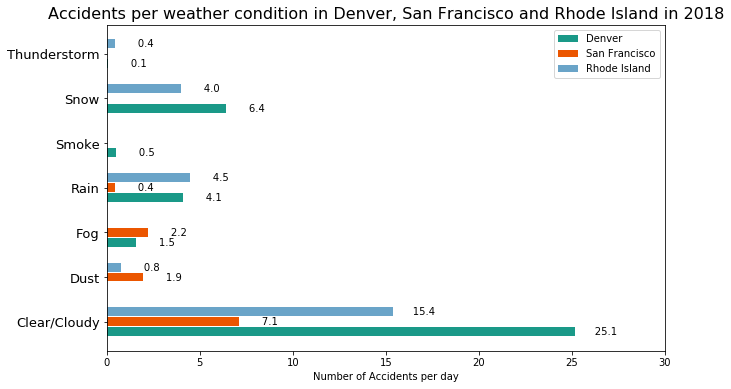

In [47]:
width = 0.2  # the width of the bars
x = np.arange(len(df_weather_denver_trans_norm.index))  # the label locations
labels = df_weather_denver_trans_norm.index

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.barh(x - width*1.1, list(df_weather_denver_trans_norm['2018']), width, label='Denver', color="#1a9988")
rects2 = ax.barh(x , list(df_weather_sf_trans_norm['2018']), width, label='San Francisco', color="#eb5600")
rects3 = ax.barh(x + width*1.1, list(df_weather_ri_trans_norm['2018']), width, label='Rhode Island', color="#6aa4c8")


# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.invert_yaxis()
ax.set_xlabel('Number of Accidents per day')
ax.set_title('Accidents per weather condition in Denver, San Francisco and Rhode Island in 2018', fontsize=16)
ax.set_yticks(x)
ax.set_xticks(np.arange(0,31,5))
ax.set_yticklabels(labels, fontsize=13)
ax.legend(loc = 'upper right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{0:10.1f}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(1, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='left', va='center')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# plt.tight_layout()
plt.savefig("Outputs/Accidents_per_weather_condition_Denver_SF_RI.png", bbox_inches='tight')

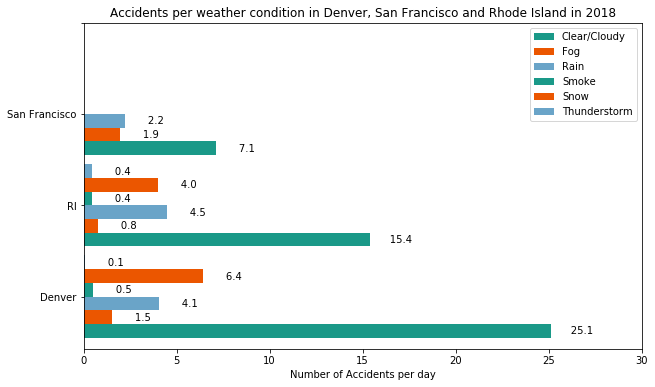

In [44]:
width = 0.15  # the width of the bars
x = np.arange(len(df_weather_den_sfo_ri_norm_clear['NAME']))  # the label locations
labels = df_weather_den_sfo_ri_norm_clear['NAME']

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.barh(x - width*2.5, list(df_weather_den_sfo_ri_norm_clear['2018_n']), width, label='Clear/Cloudy', color="#1a9988")
rects2 = ax.barh(x - width*1.5, list(df_weather_den_sfo_ri_norm_fog['2018_n']), width, label='Fog', color="#eb5600")
# rects3 = ax.barh(x - width*1.1, list(df_weather_den_sfo_ri_norm_hail['2018_n']), width, label='Hail', color="#6aa4c8")
rects4 = ax.barh(x - width*0.5, list(df_weather_den_sfo_ri_norm_rain['2018_n']), width, label='Rain', color="#6aa4c8")
rects5 = ax.barh(x + width*0.5, list(df_weather_den_sfo_ri_norm_smoke['2018_n']), width, label='Smoke', color="#1a9988")
rects6 = ax.barh(x + width*1.5, list(df_weather_den_sfo_ri_norm_snow['2018_n']), width, label='Snow', color="#eb5600")
rects7 = ax.barh(x + width*2.5, list(df_weather_den_sfo_ri_norm_thunderstorm['2018_n']), width, label='Thunderstorm', color="#6aa4c8")

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.invert_yaxis()
ax.set_xlabel('Number of Accidents per day')
ax.set_title('Accidents per weather condition in Denver, San Francisco and Rhode Island in 2018')
ax.set_yticks(np.arange(len(df_weather_den_sfo_ri_norm_clear['NAME'])+1))
ax.set_xticks(np.arange(0,31,5))
ax.set_yticklabels(labels)
ax.legend(loc = 'upper right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{0:10.1f}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(1, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='left', va='center')


autolabel(rects1)
autolabel(rects2)
# autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)

# plt.tight_layout()
plt.savefig("Outputs/Accidents_per_weather_condition_Denver_SF_RI_2.png", bbox_inches='tight')